<a href="https://colab.research.google.com/github/hoangp/isbi-datasets/blob/master/CNN_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. GDRIVE

In [0]:
# mount gdrive
from google.colab import drive
drive.mount('/content/gdrive')

project_path = 'gdrive/My Drive/cs9517-19t2-project'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls gdrive/My\ Drive/cs9517-19t2-project/output

aug  fcn16  segnet  unet


In [0]:
!rm -rf gdrive/My\ Drive/cs9517-19t2-project/output/aug
!mkdir -p gdrive/My\ Drive/cs9517-19t2-project/output/aug
!mkdir -p gdrive/My\ Drive/cs9517-19t2-project/output/fcn16
!mkdir -p gdrive/My\ Drive/cs9517-19t2-project/output/fcn16/models
!mkdir -p gdrive/My\ Drive/cs9517-19t2-project/output/fcn16/results

In [0]:
# !rm -rf gdrive/My\ Drive/cs9517-19t2-project/folds

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold0
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold0/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold0/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold0/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold0/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold1
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold1/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold1/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold1/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold1/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold2
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold2/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold2/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold2/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold2/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold3
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold3/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold3/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold3/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold3/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold4
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold4/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold4/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold4/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold4/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold5
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold5/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold5/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold5/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold5/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold6
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold6/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold6/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold6/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold6/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold7
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold7/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold7/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold7/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold7/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold8
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold8/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold8/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold8/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold8/unet/results

# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold9
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold9/aug
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold9/unet
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold9/unet/models
# !mkdir -p gdrive/My\ Drive/cs9517-19t2-project/folds/fold9/unet/results

# 1. SETUP

In [0]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.transform import resize
from keras.preprocessing.image import load_img, img_to_array, array_to_img

# PARAMETERS
fn = 0

data_train_path = project_path + '/data/images'
data_label_path = project_path + '/data/labels_tiff'
#output_path     = project_path + '/folds/fold' + str(fn)  
output_path     = project_path + '/output'
aug_path        = output_path + '/aug' 

image_size = 512
target_size = 512      # smaller target_size for quicker training

num_aug_batches = 50  # total augmented images = num_imgs * num_aug_batches
train_batch_size = 4
train_epochs = 5


# get data filenames
data_train_filenames = glob.glob(data_train_path + "/*.jpg")
data_label_filenames = glob.glob(data_label_path + "/*.tif")
data_train_filenames.sort()
data_label_filenames.sort()

# setup cross validation folds
folds = []
for i in range(10):
    fold = {}
    test_index = [0+i, 10+i, 20+i]
    fold['test_index'] = test_index
    fold['train_filenames'] = [data_train_filenames[k] for k in range(len(data_train_filenames)) if not k in test_index]
    fold['label_filenames'] = [data_label_filenames[k] for k in range(len(data_label_filenames)) if not k in test_index]
    fold['test_filenames'] = [data_train_filenames[k] for k in range(len(data_train_filenames)) if k in test_index]
    fold['test_label_filenames'] = [data_label_filenames[k] for k in range(len(data_label_filenames)) if k in test_index]
    fold['result_names'] = ['result-' + fold['test_filenames'][k].split('/')[-1].split('.')[0] for k in range(len(fold['test_filenames']))]
    folds.append(fold)
    
print('======')
print('FOLD',fn)
print('======')

print('\n----------------------------------')
print('Load and pre-process original data')
print('----------------------------------\n')

# get train/test filenames of the coresponding fold number (fn)
train_filenames = folds[fn]['train_filenames'] 
label_filenames = folds[fn]['label_filenames'] 
test_filenames = folds[fn]['test_filenames'] 
test_label_filenames = folds[fn]['test_label_filenames'] 

# get train data
X_org = np.ndarray((len(train_filenames), target_size, target_size, 1), dtype=np.uint8)
y_org = np.ndarray((len(train_filenames), target_size, target_size, 1), dtype=np.uint8)
for i in range(len(train_filenames)):
    arr_t = img_to_array(load_img(train_filenames[i], color_mode = "grayscale"))
    arr_l = img_to_array(load_img(label_filenames[i], color_mode = "grayscale"))
    if i % 10 == 0:
        print('loading', train_filenames[i].split('/')[-1], 'and', 
                         label_filenames[i].split('/')[-1], '...')
    # resize for faster training
    if target_size < image_size:
        arr_t = resize(arr_t, (target_size, target_size, 1))
        arr_l = resize(arr_l, (target_size, target_size, 1))        
    X_org[i] = arr_t
    y_org[i] = arr_l

# get test data
X_test = np.ndarray((len(test_filenames), target_size, target_size, 1), dtype=np.uint8)
y_test = np.ndarray((len(test_filenames), target_size, target_size, 1), dtype=np.uint8)
for i in range(len(test_filenames)):
    arr_t = img_to_array(load_img(test_filenames[i], color_mode = "grayscale"))
    arr_l = img_to_array(load_img(test_label_filenames[i], color_mode = "grayscale"))
    # resize for faster training
    if target_size < image_size:
        arr_t = resize(arr_t, (target_size, target_size, 1))
        arr_l = resize(arr_l, (target_size, target_size, 1))        
    X_test[i] = arr_t
    y_test[i] = arr_l

print('X_org : shape =', X_org.shape, ', min =', np.min(X_org), ', max =', np.max(X_org))
print('y_org : shape =', y_org.shape, ', min =', np.min(y_org), ', max =', np.max(y_org))
print('X_test: shape =', X_test.shape, ', min =', np.min(X_test), ', max =', np.max(X_test))
print('y_test: shape =', y_test.shape, ', min =', np.min(y_test), ', max =', np.max(y_test))

# define model
from keras.layers import *
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.engine import Layer

def convblock(cdim, nb, bits=3):
	L = []
	for k in range(1, bits + 1):
		convname = 'conv' + str(nb) + '_' + str(k)
		L.append(Convolution2D(cdim, kernel_size=(3, 3), padding='same', activation='relu', name=convname))
	L.append(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
	return L

def get_fcn16(target_size):
    # FCN32  
    withDO = True  # no effect during evaluation but usefull for fine-tuning

    model = Sequential()

    # First layer is a dummy-permutation = Identity to specify input shape
    model.add(Permute((1, 2, 3), input_shape=(target_size, target_size, 1)))  # WARNING : axis 0 is the sample dim
    for l in convblock(64, 1, bits=2):
        model.add(l)
    for l in convblock(128, 2, bits=2):
        model.add(l)
    for l in convblock(256, 3, bits=3):
        model.add(l)
    for l in convblock(512, 4, bits=3):
        model.add(l)
    for l in convblock(512, 5, bits=3):
        model.add(l)

    model.add(Convolution2D(4096, kernel_size=(7, 7), padding='same', activation='relu', name='fc6'))  # WARNING border
    if withDO:
        model.add(Dropout(0.5))

    model.add(Convolution2D(4096, kernel_size=(1, 1), padding='same', activation='relu', name='fc7'))  # WARNING border
    if withDO:
        model.add(Dropout(0.5))

    # WARNING : model decapitation i.e. remove the classifier step of VGG16 (usually named fc8)
    model.add(Convolution2D(21, kernel_size=(1, 1), padding='same', activation='relu', name='score_fr'))

    convsize = model.layers[-1].output_shape[2]
    deconv_output_size = (convsize - 1) * 2 + 4  # INFO: =34 when images are 512x512

    # WARNING : valid, same or full ?
    model.add(Deconvolution2D(21, kernel_size=(4, 4), strides=(2, 2), padding='valid', activation=None, name='score2'))

    extra_margin = deconv_output_size - convsize * 2  # INFO: =2 when images are 512x512
    assert (extra_margin > 0)
    assert (extra_margin % 2 == 0)
    
    # INFO : cropping as deconv gained pixels
    c = ((0, extra_margin), (0, extra_margin))
    model.add(Cropping2D(cropping=c))

    fcn32model = model

    # FCN16
    fcn32shape = fcn32model.layers[-1].output_shape
    assert (len(fcn32shape) == 4)
    assert (fcn32shape[0] is None)  # batch axis
    assert (fcn32shape[3] == 21)  # number of filters
    assert (fcn32shape[1] == fcn32shape[2])  # must be square

    fcn32size = fcn32shape[1]  # INFO: =32 when images are 512x512

    if fcn32size != 32:
        print('WARNING : handling of image size different from 512x512 has not been tested')

    sp4 = Convolution2D(21, kernel_size=(1, 1), padding='same', activation=None, name='score_pool4')

    # INFO : to replicate MatConvNet.DAGN.Sum layer see documentation at :
    # https://keras.io/getting-started/sequential-model-guide/
    summed = add(inputs=[sp4(fcn32model.layers[14].output), fcn32model.layers[-1].output])

    # INFO :
    # final 16x16 upsampling of "summed" using deconv layer upsample_new (32, 32, 21, 21)
    # deconv setting is valid if (528-32)/16 + 1 = deconv_input_dim (= fcn32size)
    deconv_output_size = (fcn32size - 1) * 16 + 32  # INFO: =528 when images are 512x512

    # WARNING : explanation about Deconvolution2D layer
    # http://stackoverflow.com/questions/39018767/deconvolution2d-layer-in-keras
    # the code example in the help (??Deconvolution2D) is very usefull too
    upnew = Deconvolution2D(1, kernel_size=(32, 32),
                            padding='valid',  # WARNING : valid, same or full ?
                            strides=(16, 16),
                            activation=None,
                            name='upsample_new')

    extra_margin = deconv_output_size - fcn32size * 16  # INFO: =16 when images are 512x512
    assert (extra_margin > 0)
    assert (extra_margin % 2 == 0)
    
    # INFO : cropping as deconv gained pixels
    crop_margin = Cropping2D(cropping=((0, extra_margin), (0, extra_margin)))

    return Model(fcn32model.input, crop_margin(upnew(summed)))

def get_segnet(target_size):
    img_w = target_size
    img_h = target_size
    n_labels = 1
    kernel = 3
    pad = 1
    pool_size = 2

    encoding_layers = [
        Conv2D(64, (kernel, kernel), padding="same"),  # Convolution2D(64, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (kernel, kernel), padding="same"),  # Convolution2D(64, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        Conv2D(128, (kernel, kernel), padding="same"),  # Convolution2D(128, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(128, (kernel, kernel), padding="same"),  # Convolution2D(128, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        Conv2D(256, (kernel, kernel), padding="same"),  # Convolution2D(256, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding="same"),  # Convolution2D(256, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding="same"),  # Convolution2D(256, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),

        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size)),
    ]

    decoding_layers = [
        UpSampling2D(size=(pool_size,pool_size)),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),

        UpSampling2D(size=(pool_size,pool_size)),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(512, (kernel, kernel), padding="same"),  # Convolution2D(512, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding="same"),  # Convolution2D(256, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),

        UpSampling2D(size=(pool_size,pool_size)),
        Conv2D(256, (kernel, kernel), padding="same"), # Convolution2D(256, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (kernel, kernel), padding="same"),  # Convolution2D(256, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(128, (kernel, kernel), padding="same"),  # Convolution2D(128, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),

        UpSampling2D(size=(pool_size,pool_size)),
        Conv2D(128, (kernel, kernel), padding="same"),  # Convolution2D(128, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (kernel, kernel), padding="same"),  # Convolution2D(64, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),

        UpSampling2D(size=(pool_size,pool_size)),
        Conv2D(64, (kernel, kernel), padding='same'),  # Convolution2D(64, kernel, kernel, border_mode='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(n_labels, (1, 1), padding="valid"),  # Convolution2D(n_labels, 1, 1, border_mode='valid'),
        BatchNormalization(),
    ]

    model = Sequential()

    model.add(Layer(input_shape=(img_w, img_h, 1)))

    model.encoding_layers = encoding_layers
    for l in model.encoding_layers:
        model.add(l)

    model.decoding_layers = decoding_layers
    for l in model.decoding_layers:
        model.add(l)

    #model.add(Reshape((n_labels, img_h * img_w), input_shape=(12,img_h, img_w)))
    #model.add(Permute((2, 1)))
    model.add(Activation('softmax'))
       
    return model

def get_unet(target_size):
    inputs = Input((target_size, target_size, 1))
    
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)   
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)   
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)   
    drop4 = Dropout(0.5)(conv4)   
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)   
    drop5 = Dropout(0.5)(conv5)
    
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6],axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7],axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8],axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 =concatenate([conv1,up9],axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    return Model(inputs = inputs, outputs = conv10)   

class CNN:
    def __init__(self, model_name, target_size, batch_size=None, filepath=None):
        self.model_name = model_name
        self.target_size = target_size
        self.batch_size = batch_size
        if filepath:
            from keras.models import load_model
            self.model = load_model(filepath) 
        else:
            if model_name == 'unet':
                self.model = self._get_unet()
            elif model_name == 'segnet':
                self.model = self._get_segnet()
            elif model_name == 'fcn16':
                self.model = self._get_fcn16()
            self.model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])       
    
    @classmethod
    def load(cls, filepath, model_name, target_size, batch_size): 
        return cls(model_name, target_size, batch_size, filepath)
    
    def _get_fcn16(self): 
        return get_fcn16(self.target_size)
    
    def _get_segnet(self):
        return get_segnet(self.target_size)
                                               
    def _get_unet(self):
        return get_unet(self.target_size)   
    
    def disp_summary(self):
        self.model.summary()
        
    def _get_filepath(self, num_samples, batch_size, output_path):
        save_name = "epochs:{epoch:02d}-loss:{loss:.3f}-acc:{acc:.3f}-val_loss:{val_loss:.3f}-val_acc:{val_acc:.3f}"
        save_name += '-'+ self.model_name + '-shape:' + str(self.target_size) + \
                                            '-train:' + str(num_samples) + \
                                            '-batch:' + str(batch_size)
        save_path = output_path + '/' + self.model_name + '/models'
        return save_path + '/' + save_name + '.hdf5'
    
    def _get_model_checkpoint(self, filepath):
        # Save the model after every epoch.
        # ModelCheckpoint(filepath, monitor='val_loss', verbose=0, 
        #     save_best_only=False, save_weights_only=False, mode='auto', period=1)
        # (https://keras.io/callbacks/#modelcheckpoint)       
        from keras.callbacks import ModelCheckpoint
        return ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True)
        
    def train(self, X_train, y_train, batch_size, epochs, output_path=None):
        # Trains the model for a given number of epochs (iterations on a dataset).
        # fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, 
        #     validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, 
        #     sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
        # (https://keras.io/models/model/)
        model_checkpoints = None
        if output_path:
            filepath = self._get_filepath(len(X_train), batch_size, output_path)        
            model_checkpoints = [self._get_model_checkpoint(filepath)]
        self.model.fit(X_train, y_train, batch_size, epochs, 
                       validation_split=0.2, shuffle=True, callbacks=model_checkpoints)
        
    def resume_train(self, X_train, y_train, batch_size, epochs, initial_epoch, output_path=None):        
        model_checkpoints = None
        if output_path:
            filepath = self._get_filepath(len(X_train), batch_size, output_path)        
            model_checkpoints = [self._get_model_checkpoint(filepath)]
        self.model.fit(X_train, y_train, batch_size, epochs, initial_epoch=initial_epoch,
                       validation_split=0.2, shuffle=True, callbacks=model_checkpoints)
        
    def predict(self, X_test):
        if np.max(X_test) > 1:
            print("Convert test data to float32 range 0..1")
            X_test = X_test.astype(np.float32) / 255.0
        return self.model.predict(X_test, batch_size=self.batch_size, verbose=1)
    
    def predict_and_save(self, X_test, output_path, save_names = None, save_format = 'jpg'):
        y_pred = self.predict(X_test)   
        save_path = output_path + '/' + self.model_name + '/results'
        print('Saving ' + str(len(y_pred)) + ' images to ' + save_path)       
        for i in range(len(y_pred)):
            save_name = save_names[i] if save_names else str(i)
            io.imsave(save_path + "/" + save_name + "." + save_format, y_pred[i])       
        return y_pred
    
#model = CNN('unet', target_size)
#model.disp_summary()
#model.train(X_train, y_train, train_batch_size, train_epochs)

FOLD 0

----------------------------------
Load and pre-process original data
----------------------------------

loading train-volume01.jpg and train-labels01.tif ...
loading train-volume12.jpg and train-labels12.tif ...
loading train-volume23.jpg and train-labels23.tif ...
X_org : shape = (27, 512, 512, 1) , min = 0 , max = 255
y_org : shape = (27, 512, 512, 1) , min = 0 , max = 255
X_test: shape = (3, 512, 512, 1) , min = 0 , max = 255
y_test: shape = (3, 512, 512, 1) , min = 0 , max = 255


# 2. TRAIN

## 2.1. Generate augmented images

In [0]:
print('\n-------------------------')
print('Generate augmented images')
print('-------------------------\n')

# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
# ImageDataGenerator(featurewise_center=False, samplewise_center=False, 
#     featurewise_std_normalization=False, samplewise_std_normalization=False, 
#     zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, 
#     height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, 
#     channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, 
#     vertical_flip=False, rescale=None, preprocessing_function=None, 
#     data_format=None, validation_split=0.0, dtype=None)
# (https://keras.io/preprocessing/image/)
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10, shear_range=0.1,  zoom_range=0.1,
     horizontal_flip=True, vertical_flip=True, fill_mode='constant', cval=0)

# merge label and train, one by one augmentation
for i in range(len(X_org)):
    arr_t = X_org[i]
    arr_l = y_org[i]

    s = np.shape(arr_t) # either image_size or target_size

    # Create data & label arrays for ImageDataGenerator.flow()
    arr_tl = np.ndarray(shape=(s[0],s[1],3), dtype=np.uint8) # (size, size, 3)
    arr_tl[:,:,0] = arr_t[:,:,0]
    arr_tl[:,:,2] = arr_l[:,:,0]
    arr_tl = arr_tl.reshape((1,) + arr_tl.shape) # (1, size, size, 3) -> Rank 4

    if i % 10 == 0:
        print("Generate augmented data for data & label array " + str(i) + " ...")

    # Takes data & label arrays, generates batches of augmented data.
    # flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None, 
    #      save_to_dir=None, save_prefix='', save_format='png', subset=None)
    batches = 0
    for batch in datagen.flow(arr_tl, batch_size=1, save_to_dir=aug_path, save_prefix=str(i)):
        batches += 1
        if batches >= num_aug_batches:
            break
            # we need to break the loop by hand because
            # the generator loops indefinitely       

aug_filenames = glob.glob(aug_path + "/*.*")
aug_filenames.sort()

print("\nNo. of augmented images =", len(aug_filenames), "(saved to " + aug_path + ")")


-------------------------
Generate augmented images
-------------------------

Generate augmented data for data & label array 0 ...
Generate augmented data for data & label array 10 ...
Generate augmented data for data & label array 20 ...

No. of augmented images = 1343 (saved to gdrive/My Drive/cs9517-19t2-project/output/aug)


## 2.2. Prepare X_train/y_train from augmented images

In [0]:
print('---------------------------------------------------------')
print('Create train data from original data and augmented images')
print('---------------------------------------------------------\n')

aug_filenames = glob.glob(aug_path + "/*.*")
aug_filenames.sort()

print("No. of augmented images =", len(aug_filenames), "(loaded from " + aug_path + ")\n")

X_train = np.ndarray((len(X_org) + len(aug_filenames), target_size, target_size, 1), dtype=np.float32)
y_train = np.ndarray((len(X_org) + len(aug_filenames), target_size, target_size, 1), dtype=np.float32)

# Use X_org and y_org as train data
print("loading X_org/y_org as training data ...")
for i in range(len(X_org)):
    X_train[i] = X_org[i]
    y_train[i] = y_org[i]

# Load images from augmentation folder
for i in range(len(aug_filenames)):
    if i % 100 == 0:
        print("loading augmented image " + str(i) + " ...")
    arr = img_to_array(load_img(aug_filenames[i]))
    X_train[len(X_org) + i] = arr[:,:,:1]
    y_train[len(X_org) + i] = arr[:,:,2:]

# convert X_train / y_train to 0..1
X_train /= 255.0
y_train /= 255.0

# convert y_train to 0 or 1
y_train[y_train > 0.5] = 1
y_train[y_train <= 0.5] = 0

print('X_train: shape =', X_train.shape, ', min =', np.min(X_train), ', max =', np.max(X_train))
print('y_train: shape =', y_train.shape, ', min =', np.min(y_train), ', max =', np.max(y_train))

---------------------------------------------------------
Create train data from original data and augmented images
---------------------------------------------------------

No. of augmented images = 1343 (loaded from gdrive/My Drive/cs9517-19t2-project/output/aug)

loading X_org/y_org as training data ...
loading augmented image 0 ...
loading augmented image 100 ...
loading augmented image 200 ...
loading augmented image 300 ...
loading augmented image 400 ...
loading augmented image 500 ...
loading augmented image 600 ...
loading augmented image 700 ...
loading augmented image 800 ...
loading augmented image 900 ...
loading augmented image 1000 ...
loading augmented image 1100 ...
loading augmented image 1200 ...
loading augmented image 1300 ...
X_train: shape = (1370, 512, 512, 1) , min = 0.0 , max = 1.0
y_train: shape = (1370, 512, 512, 1) , min = 0.0 , max = 1.0


## 2.3. Train 

### 2.3.1. Train from scratch

In [0]:
model_name = 'fcn16'
print('Loading CNN model: ' + model_name + '\n')
model = CNN(model_name, target_size)

Loading CNN model: fcn16



W0802 21:56:16.030970 140522434946944 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
print('-----')
print('TRAIN')
print('-----\n')

model.train(X_train, y_train, train_batch_size, train_epochs, output_path)

-----
TRAIN
-----

Train on 1096 samples, validate on 274 samples
Epoch 1/5
1096/1096 [==============================] - 521s 476ms/step - loss: 1.4482 - acc: 0.6571 - val_loss: 0.9404 - val_acc: 0.7238

Epoch 00001: loss improved from inf to 1.44815, saving model to gdrive/My Drive/cs9517-19t2-project/output/fcn16/models/epochs:01-loss:1.448-acc:0.657-val_loss:0.940-val_acc:0.724-fcn16-shape:512-train:1370-batch:4.hdf5
Epoch 2/5
1096/1096 [==============================] - 505s 461ms/step - loss: 0.8293 - acc: 0.7043 - val_loss: 0.7445 - val_acc: 0.7332

Epoch 00002: loss improved from 1.44815 to 0.82926, saving model to gdrive/My Drive/cs9517-19t2-project/output/fcn16/models/epochs:02-loss:0.829-acc:0.704-val_loss:0.744-val_acc:0.733-fcn16-shape:512-train:1370-batch:4.hdf5
Epoch 3/5
1096/1096 [==============================] - 500s 456ms/step - loss: 0.6502 - acc: 0.7336 - val_loss: 0.5842 - val_acc: 0.7422

Epoch 00003: loss improved from 0.82926 to 0.65017, saving model to gdrive/M

### 2.3.2. Resume a training

In [0]:
print('---------------')
print('RESUME TRAINING')
print('---------------\n')

model_filename = 'epochs:56-loss:0.233-acc:0.767-val_loss:0.289-val_acc:0.765-fcn16-shape:512-train:1370-batch:4.hdf5'
model_filepath = output_path + '/fcn16/models/' + model_filename

print('Resume training from: ' + model_filepath + '\n')

model = CNN.load(model_filepath, model_name='fcn16', target_size=512, batch_size=4)
model.resume_train(X_train, y_train, train_batch_size, epochs=100, initial_epoch=56, output_path=output_path)

---------------
RESUME TRAINING
---------------

Resume training from: gdrive/My Drive/cs9517-19t2-project/output/fcn16/models/epochs:56-loss:0.233-acc:0.767-val_loss:0.289-val_acc:0.765-fcn16-shape:512-train:1370-batch:4.hdf5

Train on 1096 samples, validate on 274 samples
Epoch 57/100
1096/1096 [==============================] - 507s 462ms/step - loss: 0.2610 - acc: 0.7850 - val_loss: 0.2883 - val_acc: 0.7553

Epoch 00057: loss improved from inf to 0.26102, saving model to gdrive/My Drive/cs9517-19t2-project/output/fcn16/models/epochs:57-loss:0.261-acc:0.785-val_loss:0.288-val_acc:0.755-fcn16-shape:512-train:1370-batch:4.hdf5
Epoch 58/100
1096/1096 [==============================] - 497s 453ms/step - loss: 0.2337 - acc: 0.7474 - val_loss: 0.2805 - val_acc: 0.7125

Epoch 00058: loss improved from 0.26102 to 0.23370, saving model to gdrive/My Drive/cs9517-19t2-project/output/fcn16/models/epochs:58-loss:0.234-acc:0.747-val_loss:0.281-val_acc:0.712-fcn16-shape:512-train:1370-batch:4.hdf5

# 3. RESULTS

## 3.2. Load a trained model

Load trained model from: gdrive/My Drive/cs9517-19t2-project/output/fcn16/models/epochs:27-loss:0.300-acc:0.822-val_loss:0.332-val_acc:0.810-fcn16-shape:512-train:1370-batch:4.hdf5


--------
Predict
--------

Convert test data to float32 range 0..1
3/3 [==============================] - 1s 241ms/step


W0805 00:02:25.697828 140342493321088 util.py:61] Lossy conversion from float32 to uint8. Range [-0.16595226526260376, 2.4716827869415283]. Convert image to uint8 prior to saving to suppress this warning.
W0805 00:02:25.717049 140342493321088 util.py:61] Lossy conversion from float32 to uint8. Range [-0.1954379379749298, 2.41756010055542]. Convert image to uint8 prior to saving to suppress this warning.
W0805 00:02:25.736689 140342493321088 util.py:61] Lossy conversion from float32 to uint8. Range [-0.24361063539981842, 2.1866507530212402]. Convert image to uint8 prior to saving to suppress this warning.


Saving 3 images to gdrive/My Drive/cs9517-19t2-project/output/fcn16/results
Convert test data to float32 range 0..1
3/3 [==============================] - 0s 150ms/step
Saving 3 images to gdrive/My Drive/cs9517-19t2-project/output/fcn16/results

-----------------
Visualize results
-----------------



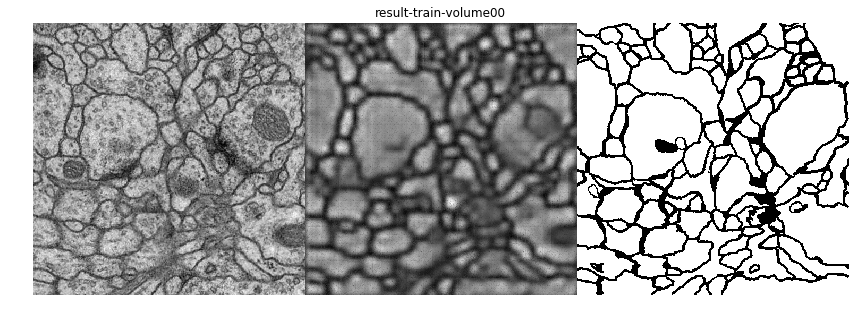

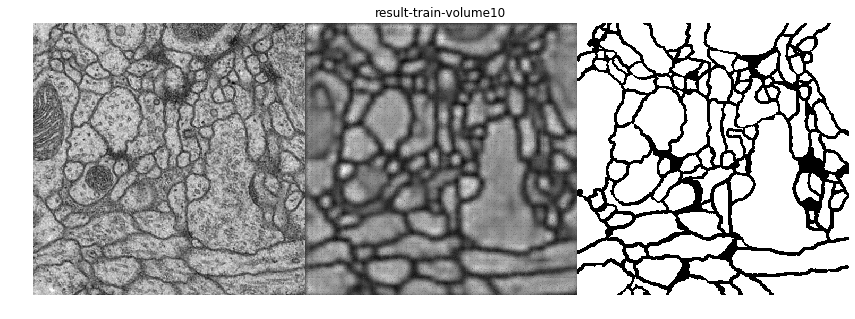

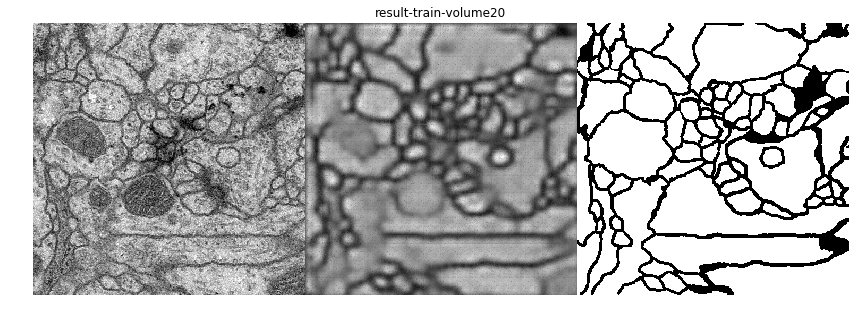

In [0]:
model_filename = 'epochs:27-loss:0.300-acc:0.822-val_loss:0.332-val_acc:0.810-fcn16-shape:512-train:1370-batch:4.hdf5'
model_filepath = output_path + '/fcn16/models/' + model_filename

print('Load trained model from: ' + model_filepath + '\n')

model = CNN.load(model_filepath, model_name='fcn16', target_size=512, batch_size=4)

print('\n--------')
print('Predict')
print('--------\n')

#y_pred = model.predict(X_test)

y_pred = model.predict_and_save(X_test, output_path, save_names=folds[fn]['result_names'], save_format='jpg')
y_pred = model.predict_and_save(X_test, output_path, save_names=folds[fn]['result_names'], save_format='tif')

print('\n-----------------')
print('Visualize results')
print('-----------------\n')

for i in range(len(X_test)):
    img_t = array_to_img(X_test[i])
    img_p = array_to_img(y_pred[i])
    img_l = array_to_img(y_test[i])

    plt.figure(i, figsize=(15, 5))
    plt.imshow(np.hstack((img_t, img_p, img_l)), cmap='gray')
    plt.title(folds[fn]['result_names'][i])
    plt.axis('off')


-----------------
Visualize results
-----------------

Convert test data to float32 range 0..1
3/3 [==============================] - 1s 184ms/step
Saving 3 images to gdrive/My Drive/cs9517-19t2-project/output/fcn16/results


W0803 10:08:50.820019 139784004196224 util.py:61] Lossy conversion from float32 to uint8. Range [-0.17810162901878357, 1.5865628719329834]. Convert image to uint8 prior to saving to suppress this warning.
W0803 10:08:50.839659 139784004196224 util.py:61] Lossy conversion from float32 to uint8. Range [-0.16444583237171173, 1.7064571380615234]. Convert image to uint8 prior to saving to suppress this warning.
W0803 10:08:50.858143 139784004196224 util.py:61] Lossy conversion from float32 to uint8. Range [-0.25284889340400696, 1.7940593957901]. Convert image to uint8 prior to saving to suppress this warning.


Convert test data to float32 range 0..1
3/3 [==============================] - 0s 152ms/step
Saving 3 images to gdrive/My Drive/cs9517-19t2-project/output/fcn16/results


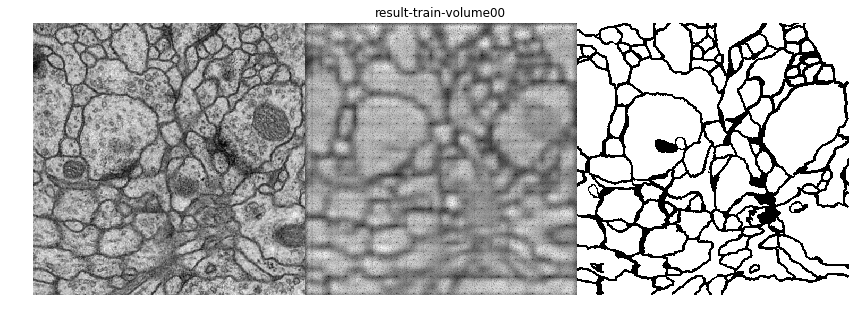

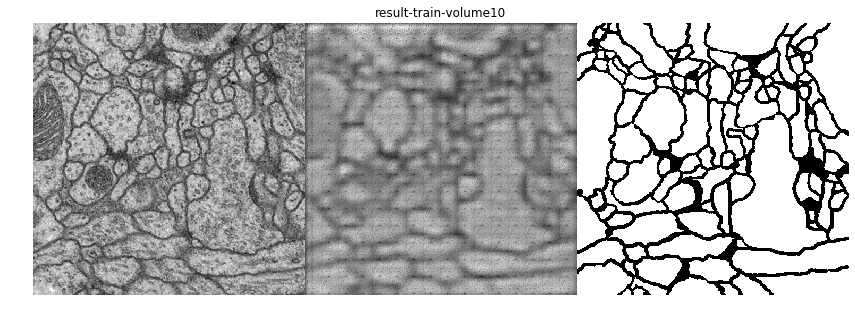

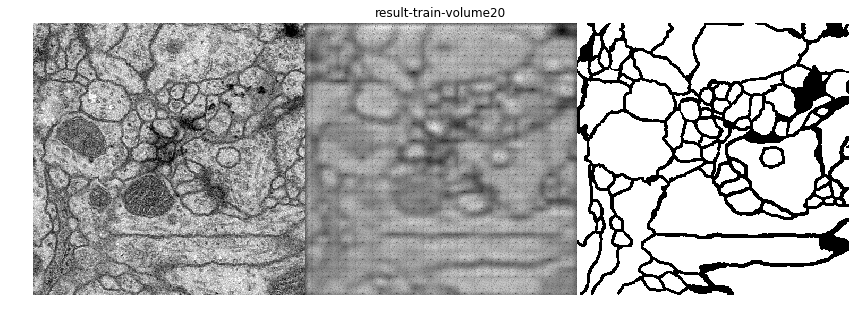

In [0]:
print('\n-----------------')
print('Visualize results')
print('-----------------\n')

# y_pred = model.predict(X_test)

y_pred = model.predict_and_save(X_test, output_path, save_names=folds[fn]['result_names'], save_format='jpg')
y_pred = model.predict_and_save(X_test, output_path, save_names=folds[fn]['result_names'], save_format='tif')

for i in range(len(X_test)):
    img_t = array_to_img(X_test[i])
    img_p = array_to_img(y_pred[i])
    img_l = array_to_img(y_test[i])

    plt.figure(i, figsize=(15, 5))
    plt.imshow(np.hstack((img_t, img_p, img_l)), cmap='gray')
    plt.title(folds[fn]['result_names'][i])
    plt.axis('off')